N=9

In [71]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from helperFunctions import *

# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        layers = []
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            input_size = hidden_size
        layers.append(nn.Linear(input_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
    
# Early Stopping 설정
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

# Plot training curves
def plot_training_curves(training_losses, validation_losses, validation_accuracies):
    epochs = range(1, len(training_losses) + 1)
    
    plt.figure(figsize=(14, 5))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_losses, 'b', label='Training Loss')
    plt.plot(epochs, validation_losses, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, validation_accuracies, 'g', label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [72]:





# preprocess dataset for
n = 9
X_train, X_val, X_test, y_train, y_val, y_test = preprocess(n=n, validate=True, standardize=True)

#degree
possible_e_vals = [1, 2, 3]
device = torch.device("cpu")

for e in possible_e_vals:

    # 다항식 특징 생성
    poly = PolynomialFeatures(degree=e)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    # 텐서로 변환
    X_train_tensor = torch.tensor(X_train_poly, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val_poly, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test_poly, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

    # 모델 초기화
    input_size = X_train_poly.shape[1]
    hidden_sizes = [128, 64]  # 원하는 은닉층 크기 리스트
    output_size = len(np.unique(y_train))  # 클래스 수를 출력 크기로 사용

    model = MLP(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 학습
    epochs = 10
    batch_size = 32
    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]
            
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # 검증 및 테스트 데이터 평가
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_predictions = torch.argmax(val_outputs, dim=1).cpu().numpy()
        val_accuracy = accuracy_score(y_val, val_predictions)
        
        test_outputs = model(X_test_tensor)
        test_predictions = torch.argmax(test_outputs, dim=1).cpu().numpy()
        test_accuracy = accuracy_score(y_test, test_predictions)
    
    # 생성된 특징 수 계산 및 결과 저장
    
    print(f"n={n}, e={e}, Validation Accuracy={val_accuracy:.4f}, Test Accuracy={test_accuracy:.4f}")
targetAcc = targetPerformance(n)
print(f"Target Accuracy:{targetAcc:.4f}")

n=9, e=1, Validation Accuracy=0.9606, Test Accuracy=0.9572
n=9, e=2, Validation Accuracy=0.9600, Test Accuracy=0.9564
n=9, e=3, Validation Accuracy=0.9531, Test Accuracy=0.9503
Target Accuracy:0.9500


N=12

In [77]:
# preprocess dataset for
n = 15
X_train, X_val, X_test, y_train, y_val, y_test = preprocess(n=n, validate=True, standardize=True)

#degree
possible_e_vals = [1, 2, 3]
device = torch.device("cpu")

for e in possible_e_vals:

    # 다항식 특징 생성
    poly = PolynomialFeatures(degree=e)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    # 텐서로 변환
    X_train_tensor = torch.tensor(X_train_poly, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val_poly, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test_poly, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

    # 모델 초기화
    input_size = X_train_poly.shape[1]
    hidden_sizes = [128, 64]  # 원하는 은닉층 크기 리스트
    output_size = len(np.unique(y_train))  # 클래스 수를 출력 크기로 사용

    model = MLP(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 학습
    epochs = 10
    batch_size = 32
    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]
            
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # 검증 및 테스트 데이터 평가
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_predictions = torch.argmax(val_outputs, dim=1).cpu().numpy()
        val_accuracy = accuracy_score(y_val, val_predictions)
        
        test_outputs = model(X_test_tensor)
        test_predictions = torch.argmax(test_outputs, dim=1).cpu().numpy()
        test_accuracy = accuracy_score(y_test, test_predictions)
    
    # 생성된 특징 수 계산 및 결과 저장
    
    print(f"n={n}, e={e}, Validation Accuracy={val_accuracy:.4f}, Test Accuracy={test_accuracy:.4f}")
targetAcc = targetPerformance(n)
print(f"Target Accuracy:{targetAcc:.4f}")

n=15, e=1, Validation Accuracy=0.8770, Test Accuracy=0.8817
n=15, e=2, Validation Accuracy=0.5513, Test Accuracy=0.5563
n=15, e=3, Validation Accuracy=0.5623, Test Accuracy=0.5678
Target Accuracy:0.9000


N=15
-Added PCA part
-Removed because it was meaningless

Epoch 1/100, Training Loss: 468.6117, Validation Loss: 0.6932, Validation Accuracy: 0.4956
Epoch 2/100, Training Loss: 467.7630, Validation Loss: 0.6934, Validation Accuracy: 0.5100
Epoch 3/100, Training Loss: 467.7247, Validation Loss: 0.6940, Validation Accuracy: 0.5114
Epoch 4/100, Training Loss: 467.1154, Validation Loss: 0.6941, Validation Accuracy: 0.5019
Epoch 5/100, Training Loss: 466.6381, Validation Loss: 0.6947, Validation Accuracy: 0.5008
Epoch 6/100, Training Loss: 465.1009, Validation Loss: 0.6952, Validation Accuracy: 0.5106
Epoch 7/100, Training Loss: 462.8957, Validation Loss: 0.6999, Validation Accuracy: 0.5026
Epoch 8/100, Training Loss: 459.3833, Validation Loss: 0.6975, Validation Accuracy: 0.5126
Epoch 9/100, Training Loss: 452.3039, Validation Loss: 0.6951, Validation Accuracy: 0.5306
Epoch 10/100, Training Loss: 432.2874, Validation Loss: 0.6295, Validation Accuracy: 0.6247
Epoch 11/100, Training Loss: 323.0023, Validation Loss: 0.4370, Validation Accuracy: 0.82

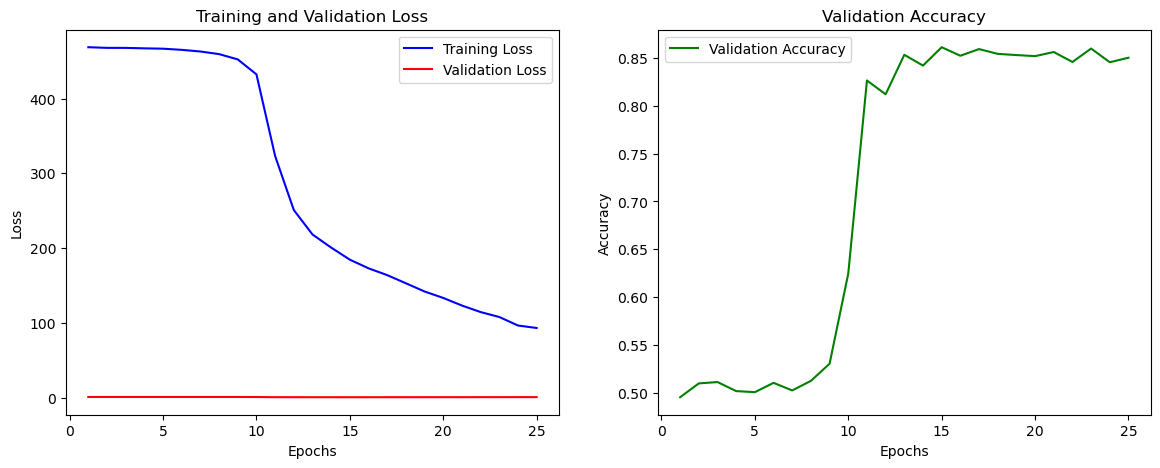

n=18, e=1, Test Accuracy=0.8474
Target Accuracy: 0.8750


In [ ]:

class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        layers = []
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.LeakyReLU())
            input_size = hidden_size
        layers.append(nn.Linear(input_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
    

import torch
import torch.nn as nn

# Residual Block 정의
class ResidualBlock(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_prob=0.3):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.leaky_relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_prob)

        self.fc2 = nn.Linear(hidden_size, input_size)
        self.bn2 = nn.BatchNorm1d(input_size)

    def forward(self, x):
        identity = x  # Skip connection
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.bn2(out)
        out += identity  # Add skip connection
        return self.leaky_relu(out)


# ResNet 모델 정의
class ResNetMLP(nn.Module):
    def __init__(self, input_size, output_size, num_blocks, hidden_size, dropout_prob=0.3):
        super(ResNetMLP, self).__init__()
        self.initial_layer = nn.Linear(input_size, hidden_size)
        self.blocks = nn.ModuleList(
            [ResidualBlock(hidden_size, hidden_size, dropout_prob) for _ in range(num_blocks)]
        )
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.initial_layer(x)
        for block in self.blocks:
            out = block(out)
        out = self.output_layer(out)
        return out


# Training parameters
n = 15
possible_e_vals = [1]
device = torch.device("cpu")
epochs = 100
batch_size = 32
patience = 10   # Early stopping patience

# Preprocess and model setup
for e in possible_e_vals:
    # 데이터 로드 및 다항식 변환만 적용
    X = np.load(f'../Datasets/kryptonite-{n}-X.npy')
    y = np.load(f'../Datasets/kryptonite-{n}-y.npy')
    
    # 데이터 분할
    from sklearn.model_selection import train_test_split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # 다항식 특징 생성
    poly = PolynomialFeatures(degree=e)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    # 표준화
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_val_poly = scaler.transform(X_val_poly)
    X_test_poly = scaler.transform(X_test_poly)
    
    # 텐서로 변환
    X_train_tensor = torch.tensor(X_train_poly, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val_poly, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test_poly, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

    input_size = X_train_poly.shape[1]
    hidden_sizes = [256, 128, 64]
    output_size = len(np.unique(y_train))
    model = MLP(input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size).to(device)
    #model = ResNetMLP(input_size=input_size, output_size=output_size, num_blocks = 3, = hidden_sizes=128, ).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    early_stopping = EarlyStopping(patience=patience)

    # Lists to store losses and accuracy for plotting
    training_losses = []
    validation_losses = []
    validation_accuracies = []

    # Training with Early Stopping
    for epoch in range(epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        epoch_loss = 0
        for i in range(0, X_train_tensor.size(0), batch_size):
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]
            
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Validation loss and accuracy
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor).item()
            val_predictions = torch.argmax(val_outputs, dim=1).cpu().numpy()
            val_accuracy = accuracy_score(y_val, val_predictions)
        
        # Save losses and accuracy for plotting
        training_losses.append(epoch_loss)
        validation_losses.append(val_loss)
        validation_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        
        # Check early stopping
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # Plot training curves after each fold
    plot_training_curves(training_losses, validation_losses, validation_accuracies)

    # Evaluation on the test set
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_predictions = torch.argmax(test_outputs, dim=1).cpu().numpy()
        test_accuracy = accuracy_score(y_test, test_predictions)
    
    print(f"n={n}, e={e}, Test Accuracy={test_accuracy:.4f}")

targetAcc = targetPerformance(n)
print(f"Target Accuracy: {targetAcc:.4f}")


n = 18

In [82]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# EarlyStopping 클래스 정의
class EarlyStopping:
    def __init__(self, patience=7, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

# Bottleneck Residual Block 정의
class BottleneckResidualBlock(nn.Module):
    def __init__(self, input_size, hidden_size, bottleneck_size, dropout_prob=0.3):
        super(BottleneckResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_size, bottleneck_size)
        self.bn1 = nn.BatchNorm1d(bottleneck_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)

        self.fc2 = nn.Linear(bottleneck_size, bottleneck_size)
        self.bn2 = nn.BatchNorm1d(bottleneck_size)

        self.fc3 = nn.Linear(bottleneck_size, input_size)
        self.bn3 = nn.BatchNorm1d(input_size)

    def forward(self, x):
        identity = x
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.bn3(out)
        out += identity
        return self.relu(out)

# ResNet 모델 정의
class ResNetMLP(nn.Module):
    def __init__(self, input_size, output_size, num_blocks, hidden_size=256, bottleneck_size=128, dropout_prob=0.3):
        super(ResNetMLP, self).__init__()
        self.initial_layer = nn.Linear(input_size, hidden_size)
        self.blocks = nn.ModuleList([
            BottleneckResidualBlock(hidden_size, hidden_size, bottleneck_size, dropout_prob) for _ in range(num_blocks)
        ])
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.initial_layer(x)
        for block in self.blocks:
            out = block(out)
        return self.output_layer(out)

# 학습 및 평가 함수
def train_and_evaluate_resnet(n, degree=1, epochs=150, batch_size=64, patience=20, hidden_size=256, bottleneck_size=128, num_blocks=8):
    # 데이터 로드 및 다항식 변환
    X = np.load(f'../Datasets/kryptonite-{n}-X.npy')
    y = np.load(f'../Datasets/kryptonite-{n}-y.npy')

    # 데이터 분할
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

    # 다항식 특징 생성 및 표준화
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_val_poly = scaler.transform(X_val_poly)
    X_test_poly = scaler.transform(X_test_poly)

    # 텐서 변환
    device = torch.device("cpu")
    X_train_tensor = torch.tensor(X_train_poly, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val_poly, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test_poly, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

    # 학습률 계산
    XTX = np.matmul(X_train_poly.T, X_train_poly)
    eigenvalues = np.linalg.eigvals(XTX)
    learning_rate = 2 / max(eigenvalues.real)

    # 모델 초기화
    input_size = X_train_poly.shape[1]
    output_size = len(np.unique(y_train))
    model = ResNetMLP(input_size=input_size, output_size=output_size, num_blocks=num_blocks, hidden_size=hidden_size, bottleneck_size=bottleneck_size).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)
    early_stopping = EarlyStopping(patience=patience)

    training_losses, validation_losses, validation_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for i in range(0, X_train_tensor.size(0), batch_size):
            batch_x, batch_y = X_train_tensor[i:i + batch_size], y_train_tensor[i:i + batch_size]
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor).item()
            val_predictions = torch.argmax(val_outputs, dim=1).cpu().numpy()
            val_accuracy = accuracy_score(y_val, val_predictions)

        training_losses.append(epoch_loss)
        validation_losses.append(val_loss)
        validation_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        scheduler.step(val_loss)
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    # 테스트 성능 평가
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_predictions = torch.argmax(test_outputs, dim=1).cpu().numpy()
        test_accuracy = accuracy_score(y_test, test_predictions)

    print(f"n={n}, Test Accuracy={test_accuracy:.4f}")

# 실행
train_and_evaluate_resnet(n=15, degree=1)


/opt/anaconda3/envs/kryptonite_env/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/150, Training Loss: 228.0367, Validation Loss: 0.7040, Validation Accuracy: 0.4963
Epoch 2/150, Training Loss: 212.9995, Validation Loss: 0.7096, Validation Accuracy: 0.4872
Epoch 3/150, Training Loss: 206.5674, Validation Loss: 0.7059, Validation Accuracy: 0.4915
Epoch 4/150, Training Loss: 204.8974, Validation Loss: 0.7012, Validation Accuracy: 0.4937
Epoch 5/150, Training Loss: 204.3317, Validation Loss: 0.7018, Validation Accuracy: 0.4933
Epoch 6/150, Training Loss: 203.5965, Validation Loss: 0.6965, Validation Accuracy: 0.5095
Epoch 7/150, Training Loss: 201.3899, Validation Loss: 0.6992, Validation Accuracy: 0.4930
Epoch 8/150, Training Loss: 201.6448, Validation Loss: 0.6950, Validation Accuracy: 0.4967
Epoch 9/150, Training Loss: 199.7054, Validation Loss: 0.6976, Validation Accuracy: 0.4918
Epoch 10/150, Training Loss: 199.9921, Validation Loss: 0.6955, Validation Accuracy: 0.4972
Epoch 11/150, Training Loss: 198.9575, Validation Loss: 0.6955, Validation Accuracy: 0.50

KeyboardInterrupt: 